<a href="https://colab.research.google.com/github/ritesh-18/spam-mail-prediction/blob/main/Spam_Ham_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

#df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")
#df.sample(10)

In [ ]:
df1= pd.read_csv ('emails.csv')
df1.sample(10)

,text,spam
4278,Subject: entouch newsletter business highligh...,0
5594,"Subject: re : signature ' s kevin , i would ...",0
1650,Subject: optical network engineering & enron r...,0
580,Subject: here is the place to find the one you...,1
2822,Subject: re : willow and pathstar evaluations ...,0
3106,"Subject: credit exposure model alex , i have...",0
2132,"Subject: re : research meeting steve , yes ....",0
666,Subject: aggressive investors should be watchi...,1
2512,"Subject: re : prosym license hi karolina , t...",0
994,Subject: secure your account dear lasalle ban...,1


In [ ]:
df1['text'][0]
print('/n')
df1['text'][0]

/n


"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [ ]:
df1.shape

(5728, 2)

        ** **There** is no extra column , no need to drop any column from dataset
        Here 0-->Ham
        and 1-->Spam **

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df1.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
#check for duplicate value
df1.duplicated().sum()

33

In [ ]:
#Remove all dulpicate data
df1=df1.drop_duplicates(keep='first') 

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.shape

(5695, 2)

In [ ]:
#Exploratory data analysis(EDA)
df1['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

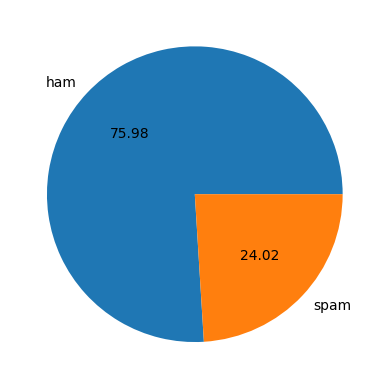

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df1['spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1['num_char']=df1['text'].apply(len)
df1.head()

,text,spam,num_char
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [ ]:
#counting number of words that are present in dataset(row-wise)
df1['num_words']=df1['text'].apply(lambda x:len( nltk.word_tokenize(x)))
df1.head()

,text,spam,num_char,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [ ]:
#counting number of sentence present in a single row data
df1['num_sentences']=df1['text'].apply(lambda x:len( nltk.sent_tokenize(x)))
df1.head()                                      

,text,spam,num_char,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [ ]:
# Subject word is present everywhere so lets remove it 
df1['text'] = df1['text'].map(lambda text: text[8:])
df1.head()

,text,spam,num_char,num_words,num_sentences
0,naturally irresistible your corporate identit...,1,1484,325,11
1,the stock trading gunslinger fanny is merril...,1,598,90,1
2,unbelievable new homes made easy im wanting ...,1,448,88,4
3,4 color printing special request additional ...,1,500,99,5
4,"do not have money , get software cds from her...",1,235,53,9


In [ ]:
#importing seaborn for ploting histogram for this given dataset 
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_char', ylabel='Count'>

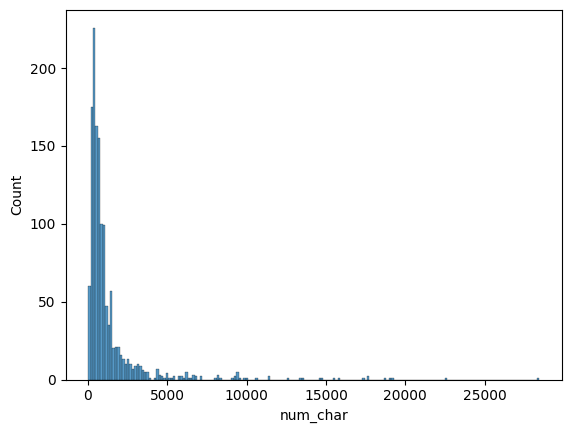

In [ ]:
#Lets see the distribution of spam using beautiful seaborn package
#this is for spam data

sns.histplot(df1[df1['spam']==1]['num_char'])

<Axes: xlabel='num_char', ylabel='Count'>

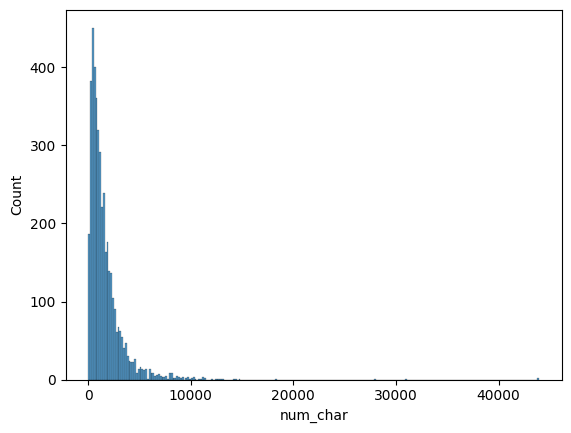

In [ ]:
sns.histplot(df1[df1['spam']==0]['num_char'])
#this is for ham data

<Axes: xlabel='num_char', ylabel='Count'>

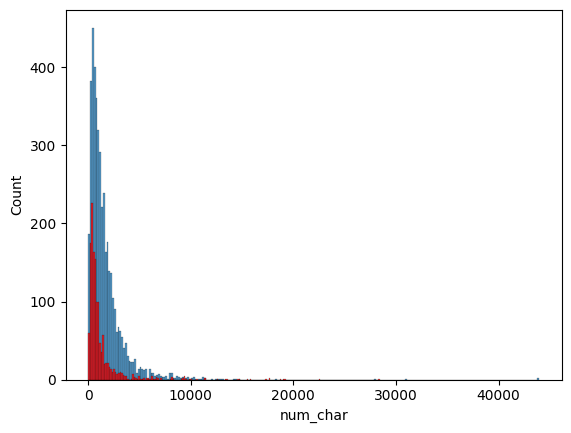

In [ ]:
sns.histplot(df1[df1['spam']==0]['num_char'])
sns.histplot(df1[df1['spam']==1]['num_char'],color ='red')


<Axes: xlabel='num_words', ylabel='Count'>

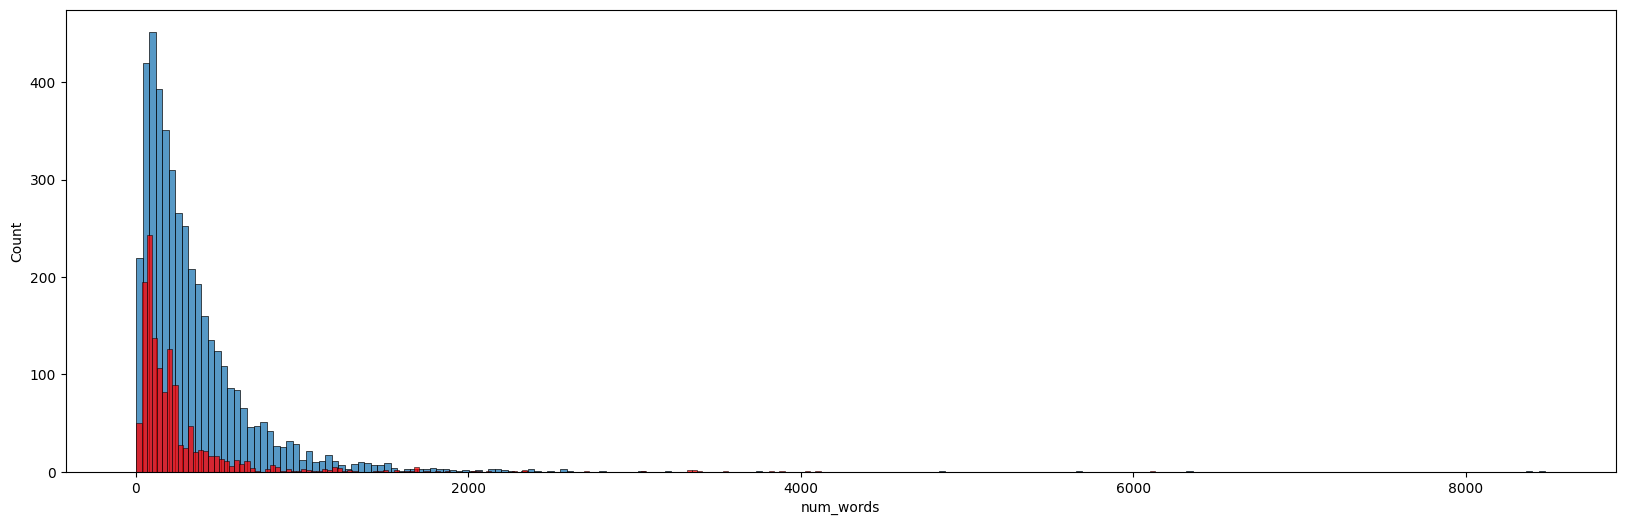

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(df1[df1['spam']==0]['num_words'])
sns.histplot(df1[df1['spam']==1]['num_words'],color ='red')

in above figure u can see that ham mail contained huge no of words(character)

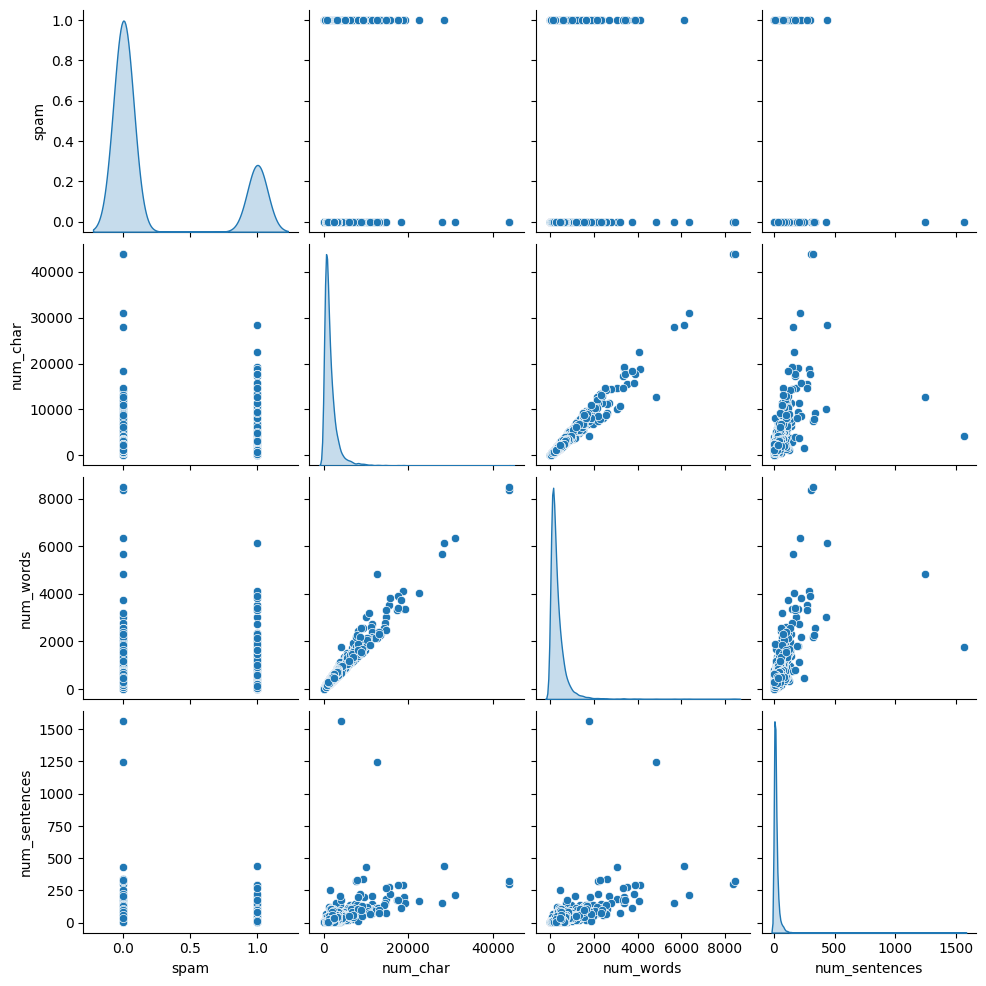

In [ ]:
sns.pairplot(df1, diag_kind='kde')

<ipython-input-32-005e2f68cb57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

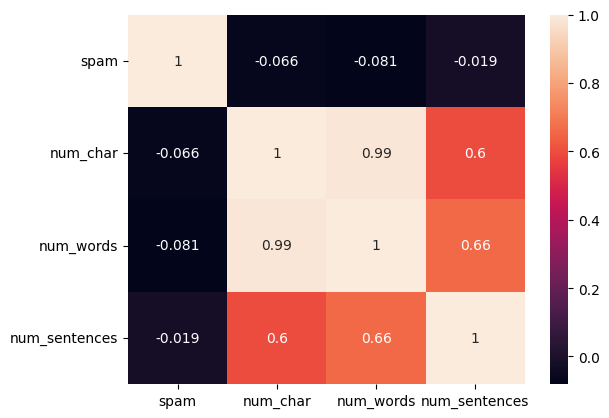

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
from nltk.stem.snowball import stopwords
#Data Preprocessing
#lowercase,tokenization,removing special char,removing stopwords,stemming
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  txt=[]
  for i in text:
    if  i.isalnum():
      txt.append(i)

  text=txt[:]
  txt.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      txt.append(i)  
  text=txt[:]
  txt.clear()    
  for i in text:
    txt.append(p.stem(i))

  return " ".join(txt)    

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
p=PorterStemmer()

In [ ]:
df1['transformed_text']=df1['text'].apply(transform_text)

In [ ]:
df1.head()

,text,spam,num_char,num_words,num_sentences,transformed_text
0,naturally irresistible your corporate identit...,1,1484,325,11,natur irresist corpor ident lt realli hard rec...
1,the stock trading gunslinger fanny is merril...,1,598,90,1,stock trade gunsling fanni merril muzo colza a...
2,unbelievable new homes made easy im wanting ...,1,448,88,4,unbeliev new home made easi im want show homeo...
3,4 color printing special request additional ...,1,500,99,5,4 color print special request addit inform cli...
4,"do not have money , get software cds from her...",1,235,53,9,money get softwar cd softwar compat great grow...


In [ ]:
from wordcloud import WordCloud


In [ ]:
wc=WordCloud(width=800,height=800,min_font_size=10,background_color='white')

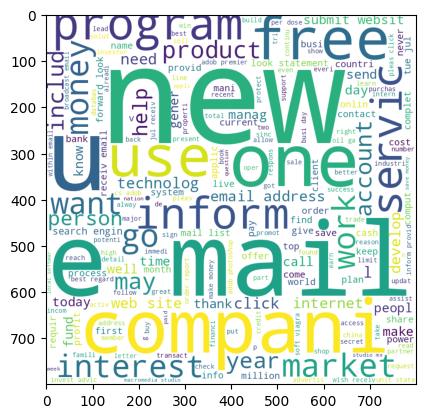

In [ ]:
spam_wc=wc.generate(df1[df1['spam']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [ ]:
df1[df1['spam']==1]['transformed_text'].tolist()

['natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morrist

In [ ]:
spam_corpus=[]
for msg in df1[df1['spam']==1]['transformed_text'].tolist():
  for w in msg.split():
    spam_corpus.append(w)

In [ ]:
len(spam_corpus)

173262

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('compani', 1065),
 ('com', 1000),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 701),
 ('get', 694),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('free', 606),
 ('3', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507)]

**#MODEL BUILDING USING NAVIES BAYES**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfdf=TfidfVectorizer()

In [ ]:
x=tfdf.fit_transform(df1['transformed_text']).toarray()

In [ ]:
x.shape

(5695, 29220)

In [ ]:
y=df1['spam'].values

In [ ]:
y


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12185542, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB() 

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9490781387181738
[[836  13]
 [ 45 245]]
0.9496124031007752


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8788410886742757
[[847   2]
 [136 154]]
0.9871794871794872


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9894644424934153
[[845   4]
 [  8 282]]
0.986013986013986


:i am chosing tfidf and bnb

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [ ]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [ ]:
# def train_classifier(clf,x_train,y_train,x_test,y_test):
#     clf.fit(x_train,y_train)
#     y_pred = clf.predict(x_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [ ]:
# train_classifier(svc,x_train,y_train,x_test,y_test)

In [ ]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [ ]:
# performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
# performance_df1

In [ ]:
#Random Forest has max prescision with better  acurracy 
#now i am creating a pipeline
#transformed_text,vectorization, algorithm using
import pickle
pickle.dump(tfdf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))